<a href="https://colab.research.google.com/github/ranadeepbhuyan/cancer-mri-analysis/blob/main/slicing/PKG_UPENN_GBM_NIfTI_files_image_sliced_for_3d_to_2d_and_sliced_into_64_parts_of_each_2d_images_along_z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3D Image to 2d along z axis total 155 slice are created and also we have taken T1 image as the brain regions are well define

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from skimage import io
import nibabel as nib
import random
import glob


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload
from googleapiclient.http import MediaIoBaseUpload


In [ ]:
#Required datapaths
DATASET_PATH = r"/content/drive/MyDrive/PKG - UPENN-GBM NIfTI files/NIfTI-files/images_structural" +'/'


In [ ]:
test_image1_t1=nib.load(DATASET_PATH + 'UPENN-GBM-00002_11/UPENN-GBM-00002_11_T1.nii')
test_image2_t1=nib.load(DATASET_PATH + 'UPENN-GBM-00007_11/UPENN-GBM-00007_11_T1.nii')
test_image3_t1=nib.load(DATASET_PATH + 'UPENN-GBM-00012_11/UPENN-GBM-00012_11_T1.nii')
test_image4_t1=nib.load(DATASET_PATH + 'UPENN-GBM-00017_11/UPENN-GBM-00017_11_T1.nii')
test_image1_t1_data=nib.load(DATASET_PATH + 'UPENN-GBM-00002_11/UPENN-GBM-00002_11_T1.nii').get_fdata()
test_image2_t1_data=nib.load(DATASET_PATH + 'UPENN-GBM-00007_11/UPENN-GBM-00007_11_T1.nii').get_fdata()
test_image3_t1_data=nib.load(DATASET_PATH + 'UPENN-GBM-00012_11/UPENN-GBM-00012_11_T1.nii').get_fdata()
test_image4_t1_data=nib.load(DATASET_PATH + 'UPENN-GBM-00017_11/UPENN-GBM-00017_11_T1.nii').get_fdata()

Text(0.5, 1.0, 'Image4 T1')

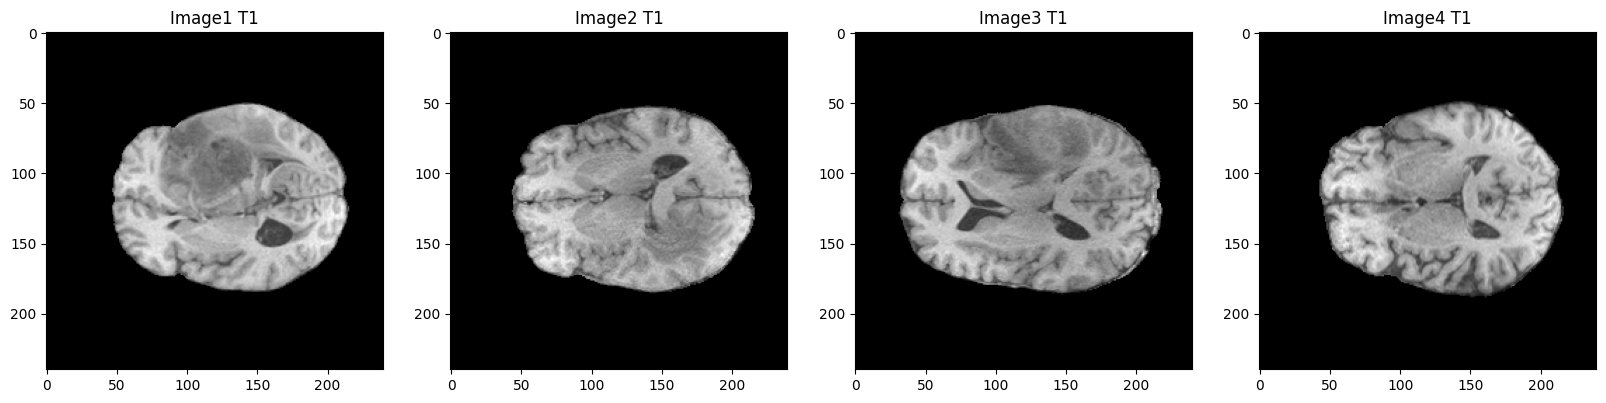

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize = (20, 10))
ax1.imshow(test_image1_t1_data[:,:,70], cmap = 'gray')
ax1.set_title('Image1 T1')
ax2.imshow(test_image2_t1_data[:,:,70], cmap = 'gray')
ax2.set_title('Image2 T1')
ax3.imshow(test_image3_t1_data[:,:,70], cmap = 'gray')
ax3.set_title('Image3 T1')
ax4.imshow(test_image4_t1_data[:,:,70], cmap = 'gray')
ax4.set_title('Image4 T1')

In [ ]:
def min_max_shape_detector(image_data):
  print(np.min(image_data), np.max(image_data), image_data.shape, type(image_data))

In [ ]:
min_max_shape_detector(test_image1_t1_data)

0.0 630.0 (240, 240, 155) <class 'numpy.memmap'>


In [ ]:
min_max_shape_detector(test_image2_t1_data)

0.0 1017.0 (240, 240, 155) <class 'numpy.memmap'>


In [ ]:
min_max_shape_detector(test_image3_t1_data)

0.0 761.0 (240, 240, 155) <class 'numpy.memmap'>


In [ ]:
SLICE_DECIMATE_IDENTIFIER = 3
SLICE_X = False
SLICE_Y = False
SLICE_Z = True

In [ ]:
imageSliceOutput = r"/content/drive/MyDrive/PKG - UPENN-GBM 3d to 2d /along z/Patients data "

In [ ]:
#fatching ids form data path
def pathListIntoIds(dirList):
    x = []
    for i in range(0,len(dirList)):
        x.append(dirList[i][dirList[i].rfind('/')+1:])
    return x


train_data_ids = [f.path for f in os.scandir(DATASET_PATH)]

training_data_ids = pathListIntoIds(train_data_ids);

In [ ]:
first_20_ids = []
for i in range(0,20):
  first_20_ids.append(training_data_ids[i])


In [ ]:
len(first_20_ids)

20

In [ ]:
def saveSlice(nii_img, img_data, fname, path):
    slice_nii_img = nib.Nifti1Image(img_data, nii_img.affine)
    fout = os.path.join(path, f'{fname}.nii')
    nib.save(slice_nii_img,fout)
    print(f'[+] Slice saved: {fout}', end='\r')

#saveSlice(img,img_data[:,:,78], 'test', imageSliceOutput)

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt

data = nib.load('/content/drive/MyDrive/PKG - UPENN-GBM 3d to 2d /data/test.nii').get_fdata()
plt.figure(figsize=(12, 4))
plt.subplot(131)  # 1 row, 3 columns, subplot 3
plt.imshow(data, cmap="gray")
plt.title("Image")

In [ ]:
test_image1_t1_data.shape[2]//3

51

In [ ]:
# Slice image in all directions and save
def sliceAndSaveVolumeImage(nii_img, vol, fname, path):
    (dimx, dimy, dimz) = vol.shape
    print(dimx, dimy, dimz)
    gap_of = 3
    cnt = 0
    if SLICE_X:
        cnt += dimx
        print('Slicing X: ')
        for i in range(dimx//gap_of):
            saveSlice(nii_img, vol[i+3,:,:], fname+f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_x', path)

    if SLICE_Y:
        cnt += dimy
        print('Slicing Y: ')
        for i in range(dimy//gap_of):
            saveSlice(nii_img, vol[:,i+3,:], fname+f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_y', path)

    if SLICE_Z:
        cnt += dimz
        print('Slicing Z: ')
        for i in range(dimz//gap_of):
            saveSlice(nii_img, vol[:,:,i+3], fname+f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_z', path)
    return cnt

In [ ]:
first_20_ids[0]

'UPENN-GBM-00001_11'

In [ ]:
print(DATASET_PATH + f'{first_20_ids[0]}/{first_20_ids[0]}_T1.nii')

/content/drive/MyDrive/PKG - UPENN-GBM NIfTI files/NIfTI-files/images_structural/UPENN-GBM-00001_11/UPENN-GBM-00001_11_T1.nii


In [ ]:
for i in range(len(first_20_ids)):
  filename1 = f'UPENN-GBM-Patients-{i}'
  image =nib.load(DATASET_PATH + f'{first_20_ids[i]}/{first_20_ids[i]}_T1.nii')
  image_data = image.get_fdata()
  print(filename1, image_data.shape, np.sum(image_data.shape), np.min(image_data), np.max(image_data))
  numOfSlices = sliceAndSaveVolumeImage(image, image_data, filename1, imageSliceOutput)
  print(f'\n{filename1}, {numOfSlices} slices created \n')


UPENN-GBM-Patients-0 (240, 240, 155) 635 0.0 709.0
240 240 155
Slicing Z: 
[+] Slice saved: /content/drive/MyDrive/PKG - UPENN-GBM 3d to 2d /along z/Patients data /UPENN-GBM-Patients-0-slice050_z.nii
UPENN-GBM-Patients-0, 155 slices created 

UPENN-GBM-Patients-1 (240, 240, 155) 635 0.0 630.0
240 240 155
Slicing Z: 
[+] Slice saved: /content/drive/MyDrive/PKG - UPENN-GBM 3d to 2d /along z/Patients data /UPENN-GBM-Patients-1-slice050_z.nii
UPENN-GBM-Patients-1, 155 slices created 

UPENN-GBM-Patients-2 (240, 240, 155) 635 0.0 694.0
240 240 155
Slicing Z: 
[+] Slice saved: /content/drive/MyDrive/PKG - UPENN-GBM 3d to 2d /along z/Patients data /UPENN-GBM-Patients-2-slice050_z.nii
UPENN-GBM-Patients-2, 155 slices created 

UPENN-GBM-Patients-3 (240, 240, 155) 635 0.0 786.0
240 240 155
Slicing Z: 
[+] Slice saved: /content/drive/MyDrive/PKG - UPENN-GBM 3d to 2d /along z/Patients data /UPENN-GBM-Patients-3-slice050_z.nii
UPENN-GBM-Patients-3, 155 slices created 

UPENN-GBM-Patients-4 (240, 2

Text(0.5, 1.0, 'Image4 T1')

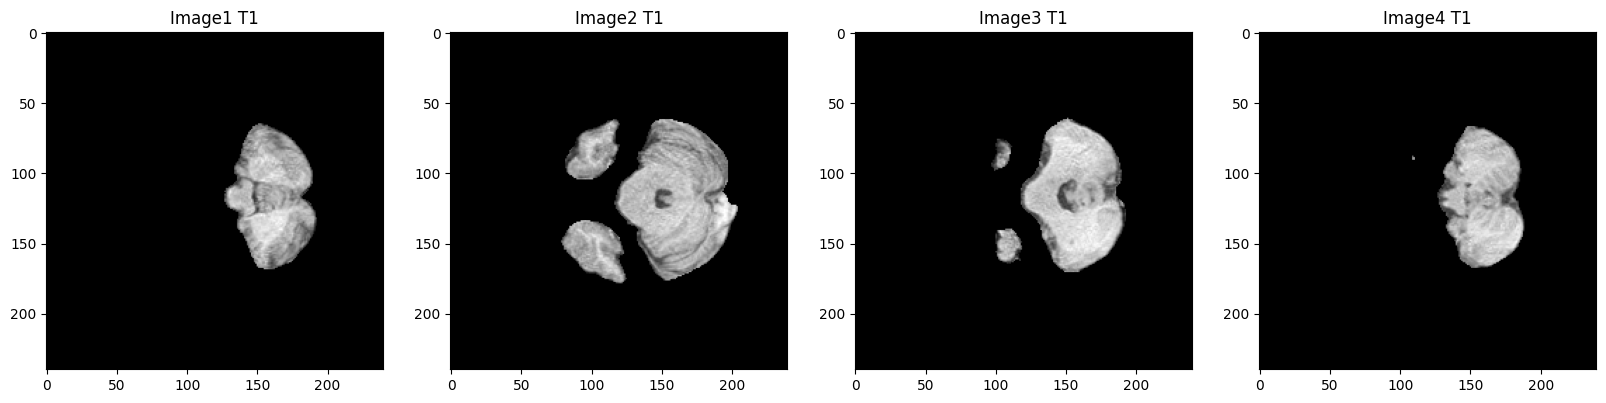

In [ ]:
data1 = nib.load('/content/drive/MyDrive/PKG - UPENN-GBM 3d to 2d /along z/Patients data /UPENN-GBM-Patients-19-slice025_z.nii').get_fdata()
data2 = nib.load('/content/drive/MyDrive/PKG - UPENN-GBM 3d to 2d /along z/Patients data /UPENN-GBM-Patients-18-slice025_z.nii').get_fdata()
data3 = nib.load('/content/drive/MyDrive/PKG - UPENN-GBM 3d to 2d /along z/Patients data /UPENN-GBM-Patients-17-slice025_z.nii').get_fdata()
data4 = nib.load('/content/drive/MyDrive/PKG - UPENN-GBM 3d to 2d /along z/Patients data /UPENN-GBM-Patients-16-slice025_z.nii').get_fdata()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize = (20, 10))
ax1.imshow(data1, cmap = 'gray')
ax1.set_title('Image1 T1')
ax2.imshow(data2, cmap = 'gray')
ax2.set_title('Image2 T1')
ax3.imshow(data3, cmap = 'gray')
ax3.set_title('Image3 T1')
ax4.imshow(data4, cmap = 'gray')
ax4.set_title('Image4 T1')

**Now slicing each 2D images into 64 parts **

In [ ]:
Data_path = imageSliceOutput

In [ ]:
#fatching ids form data path
def pathListIntoIds(dirList):
    x = []
    for i in range(0,len(dirList)):
        x.append(dirList[i][dirList[i].rfind('/')+1:])
    return x


train_data_ids = [f.path for f in os.scandir(Data_path)]

training_data_ids = pathListIntoIds(train_data_ids);

In [ ]:
len(training_data_ids)

1020

In [ ]:
final_ids = []
for i in range(len(training_data_ids)):
  path = os.path.join(Data_path, training_data_ids[i])
  img = nib.load(path).get_fdata()
  if img.max() > img.min():
    final_ids.append(training_data_ids[i].split('.nii')[0])

In [ ]:
len(final_ids)

1015

In [ ]:
def normalized_imgfunc(img_data):
  data = ((img_data - img_data.min()) / (img_data.max() - img_data.min()))
  return data


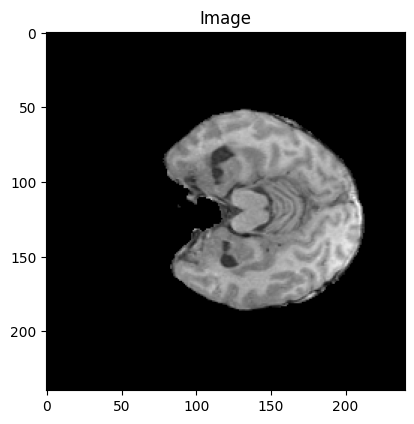

In [ ]:
path = os.path.join(Data_path, f'{final_ids[200]}.nii')
img = nib.load(path)
img_data = img.get_fdata()
normalized_img = normalized_imgfunc(img_data)

plt.figure(figsize=(12, 4))

# Plot the first 2D NIfTI image
plt.subplot(131)  # 1 row, 3 columns, subplot 1
plt.imshow(normalized_img, cmap="gray")
plt.title("Image")


plt.tight_layout()
plt.show()

In [ ]:
x_dim, y_dim = normalized_img.shape

# Split the image into 6 equal parts (2x3 grid)
x_split = x_dim // 8
y_split = y_dim // 8

subimages = []
c = 1
for i in range(8):
    for j in range(8):
        x_start, x_end = i * x_split, (i + 1) * x_split
        y_start, y_end = j * y_split, (j + 1) * y_split

        subimage = normalized_img[x_start:x_end, y_start:y_end]
        subimages.append([c,subimage])
        c = c+1

Text(0.5, 1.0, 'Image3')

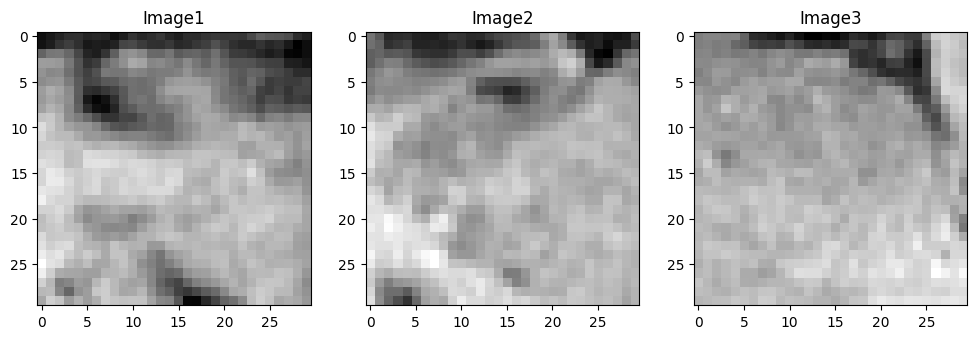

In [ ]:
plt.figure(figsize=(12, 4))

# Plot the first 2D NIfTI image
plt.subplot(131)  # 1 row, 3 columns, subplot 1
plt.imshow(subimages[34][1], cmap="gray")
plt.title("Image1")

plt.subplot(132)  # 1 row, 3 columns, subplot 1
plt.imshow(subimages[35][1], cmap="gray")
plt.title("Image2")

plt.subplot(133)  # 1 row, 3 columns, subplot 1
plt.imshow(subimages[36][1], cmap="gray")
plt.title("Image3")



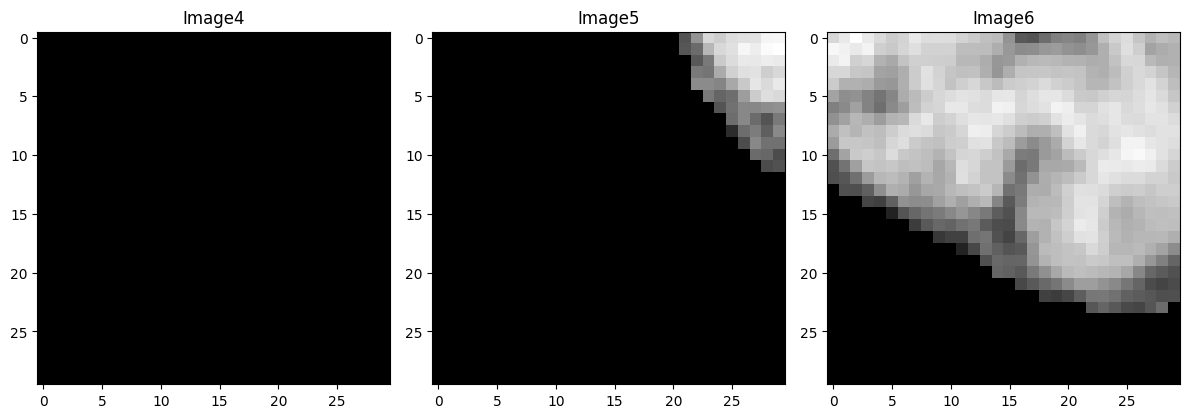

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(131)  # 1 row, 3 columns, subplot 1
plt.imshow(subimages[40][1], cmap="gray")
plt.title("Image4")

plt.subplot(132)  # 1 row, 3 columns, subplot 1
plt.imshow(subimages[41][1], cmap="gray")
plt.title("Image5")

plt.subplot(133)  # 1 row, 3 columns, subplot 1
plt.imshow(subimages[42][1], cmap="gray")
plt.title("Image6")

plt.tight_layout()
plt.show()

In [ ]:
subimages[3][1].shape

(30, 30)

In [ ]:
def saveSlice(img, fname, path):
    img = np.uint8(img * 255)
    fout = os.path.join(path, f'{fname}.png')
    cv2.imwrite(fout, img)
    print(f'[+] Slice saved: {fout}', end='\r')

In [ ]:
path2 = r"/content/drive/MyDrive/PKG - UPENN-GBM 3d to 2d /along z/Patients data into 64 parts"

In [ ]:
final_ids[0].split('-')[3]

'0'

In [ ]:
for i in range(len(final_ids)):
    patients_no = final_ids[i].split('-')[3]
    output_path = os.path.join(path2, f'Patient no {int(patients_no) + 1}')
    path = os.path.join(Data_path, f'{final_ids[i]}.nii')
    img = nib.load(path).get_fdata()
    normalized_img = normalized_imgfunc(img)
    x_dim, y_dim = normalized_img.shape
    x_split = x_dim // 8
    y_split = y_dim // 8

    c = 0
    for k in range(8):
        for j in range(8):
            x_start, x_end = k * x_split, (k + 1) * x_split
            y_start, y_end = j * y_split, (j + 1) * y_split

            subimage = normalized_img[x_start:x_end, y_start:y_end]
            ids = os.path.join(f'{final_ids[i]}_{c}')
            saveSlice(subimage, ids, output_path)
            c = c + 1
    print(f'\n{final_ids[i]}, {c} slices created \n')


[+] Slice saved: /content/drive/MyDrive/PKG - UPENN-GBM 3d to 2d /along z/Patients data into 64 parts/Patient no 1/UPENN-GBM-Patients-0-slice000_z_63.png
UPENN-GBM-Patients-0-slice000_z, 64 slices created 

[+] Slice saved: /content/drive/MyDrive/PKG - UPENN-GBM 3d to 2d /along z/Patients data into 64 parts/Patient no 1/UPENN-GBM-Patients-0-slice001_z_63.png
UPENN-GBM-Patients-0-slice001_z, 64 slices created 

[+] Slice saved: /content/drive/MyDrive/PKG - UPENN-GBM 3d to 2d /along z/Patients data into 64 parts/Patient no 1/UPENN-GBM-Patients-0-slice002_z_63.png
UPENN-GBM-Patients-0-slice002_z, 64 slices created 

[+] Slice saved: /content/drive/MyDrive/PKG - UPENN-GBM 3d to 2d /along z/Patients data into 64 parts/Patient no 1/UPENN-GBM-Patients-0-slice003_z_63.png
UPENN-GBM-Patients-0-slice003_z, 64 slices created 

[+] Slice saved: /content/drive/MyDrive/PKG - UPENN-GBM 3d to 2d /along z/Patients data into 64 parts/Patient no 1/UPENN-GBM-Patients-0-slice004_z_63.png
UPENN-GBM-Patients

In [ ]:
existing_folder_id = '1_fGTcQ0esx8Yl0wrHNCpXRZUb3tEhZIJ'
drive_service = build('drive', 'v3')

for i in range(0,20):
    file_metadata = {
        'name': f'Patient no {i}',
        'mimeType': 'application/vnd.google-apps.folder',
        'parents': [existing_folder_id]
    }

    folder = drive_service.files().create(body=file_metadata).execute()
    print(f'Created folder: Patients no {i}')


In [ ]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
